In [13]:
import pandas as pd

# 1) AGE-BASED JUDGES
df_age = pd.DataFrame({
    "strategy": [
        "S0: baseline",
        "S1: gaussian noise",
        "S2: scrambled sentences",
        "S3: token injection",
        "S4: lists",
        "S5: add controversy"
    ],
    "avg_quality":        [5.31746, 5.31746, 5.31746, 5.31746, 0.428571, 0.492063],
    "avg_horizontal_std": [1.4265, 1.4265, 1.4265, 1.4265, 0.494872, 0.514998],
    "min_vertical_std":   [3.24551, 3.24551, 3.24551, 3.24551, 0.0, 0.402374],
    "english_score":      [1, 1, 1, 1, 1, 1],
    "similarity_score":   [0.2, 0.2, 0.2, 0.2, 0.2, 0.20439],
    "final_score":        [6.28606, 6.28606, 6.28606, 6.28606, 0.0, 0.119166]
})

# 2) VALUE-BASED JUDGES
df_value = pd.DataFrame({
    "strategy": [
        "S0: baseline",
        "S1: gaussian noise",
        "S2: scrambled sentences",
        "S3: token injection",
        "S4: lists",
        "S5: add controversy"
    ],
    "avg_quality":        [6.49206, 6.49206, 6.49206, 6.49206, 0.0, 2.33333],
    "avg_horizontal_std": [0.828919, 0.828919, 0.828919, 0.828919, 0.0, 1.30777],
    "min_vertical_std":   [1.30931, 1.30931, 1.30931, 1.30931, 0.0, 0.436436],
    "english_score":      [1, 1, 1, 1, 1, 1],
    "similarity_score":   [0.2, 0.2, 0.2, 0.2, 0.2, 0.20439],
    "final_score":        [2.16375, 2.16375, 2.16375, 2.16375, 0.0, 0.418876]
})

# 3) ECONOMIC STATUS JUDGES
df_economic = pd.DataFrame({
    "strategy": [
        "S0: baseline",
        "S1: gaussian noise",
        "S2: scrambled sentences",
        "S3: token injection",
        "S4: lists",
        "S5: add controversy"
    ],
    "avg_quality":        [7.12698, 7.12698, 7.12698, 7.12698, 0.0, 3.30159],
    "avg_horizontal_std": [0.487505, 0.487505, 0.487505, 0.487505, 0.0, 0.659829],
    "min_vertical_std":   [0.46291, 0.46291, 0.46291, 0.46291, 0.0, 2.24669],
    "english_score":      [1, 1, 1, 1, 1, 1],
    "similarity_score":   [0.2, 0.2, 0.2, 0.2, 0.2, 0.20439],
    "final_score":        [0.602427, 0.602427, 0.602427, 0.602427, 0.0, 1.2728]
})

# 4) DIFFERENT MODEL JUDGES (phi4, llama, llama1b)
df_multi_model = pd.DataFrame({
    "strategy": [
        "S0: baseline",
        "S1: gaussian noise",
        "S2: scrambled sentences",
        "S3: token injection",
        "S4: lists",
        "S5: add controversy"
    ],
    "avg_quality":        [2.22222, 2.38095, 2.11111, 2.0, 0.174603, 0.238095],
    "avg_horizontal_std": [3.64418, 3.15604, 3.43661, 3.42423, 0.302422, 0.412393],
    "min_vertical_std":   [0.654654, 2.01187, 0.654654, 0.218218, 0.0, 0.0],
    "english_score":      [1, 1, 1, 1, 1, 1],
    "similarity_score":   [0.2, 0.2, 0.2, 0.2, 0.2, 0.20439],
    "final_score":        [1.75992, 4.79641, 1.63291, 0.533735, 0.0, 0.0]
})


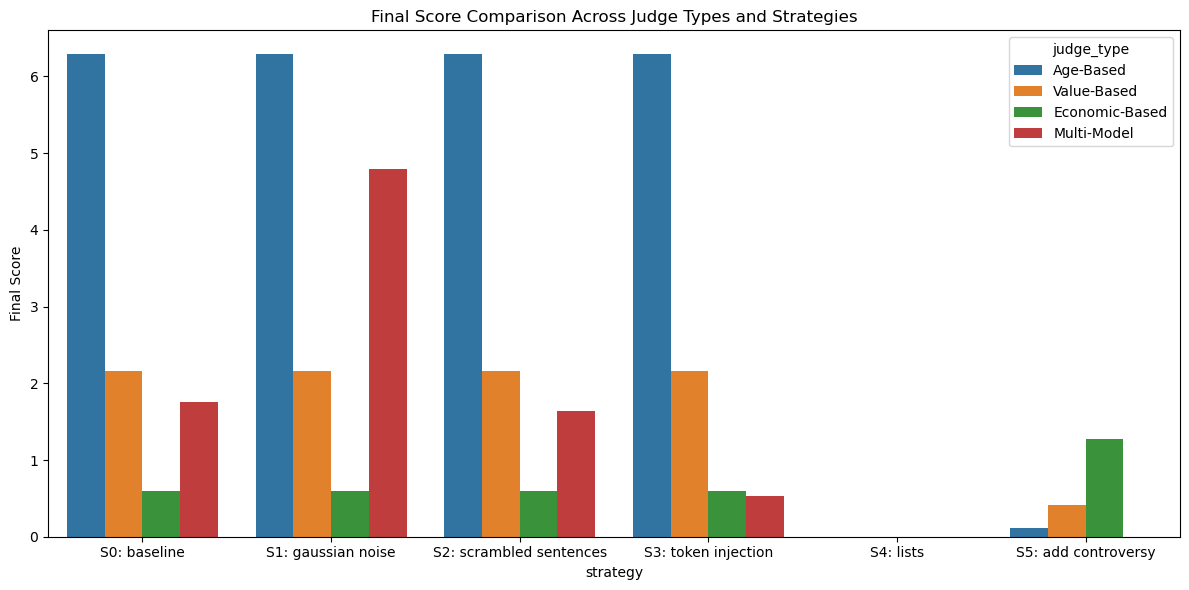

C:\Users\yogee\AppData\Local\Temp\ipykernel_33272\2540432206.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sensitivity, x="judge_type", y="std_dev", palette="Set2")


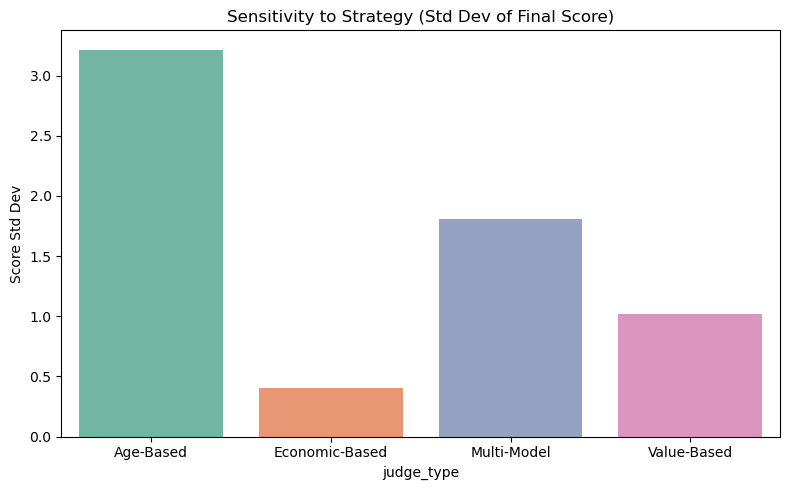

C:\Users\yogee\AppData\Local\Temp\ipykernel_33272\2540432206.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=score_drop, x="judge_type", y="Score Drop (S0 - S5)", palette="Set1")


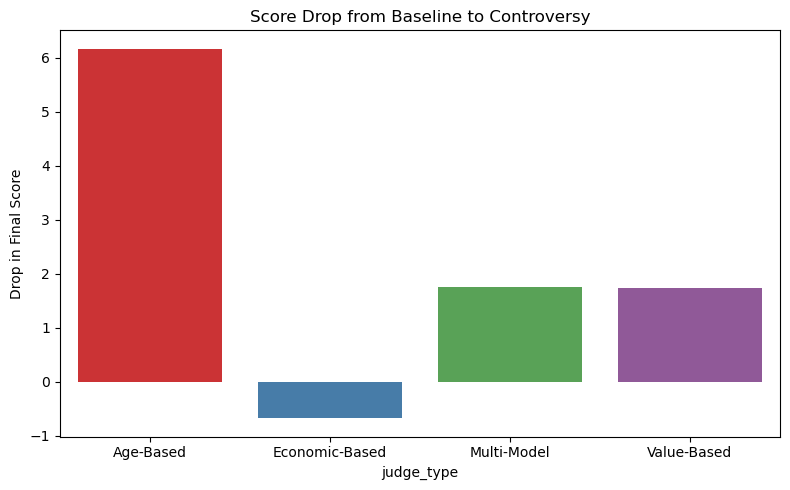

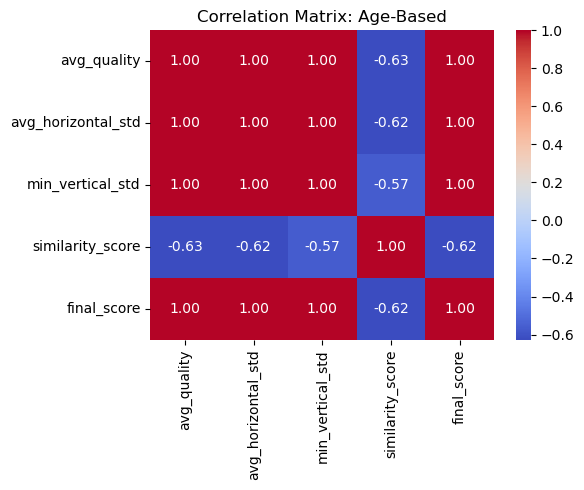

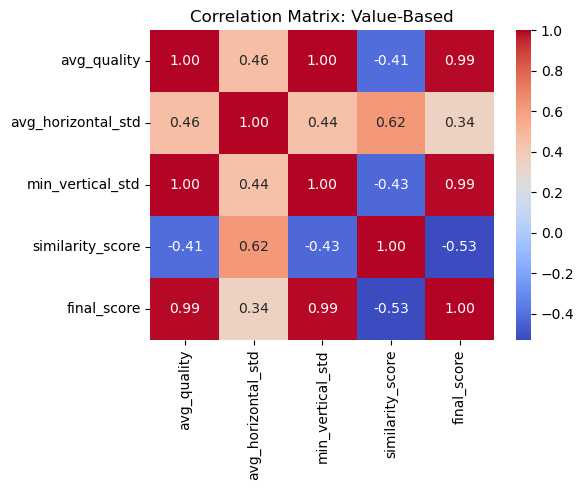

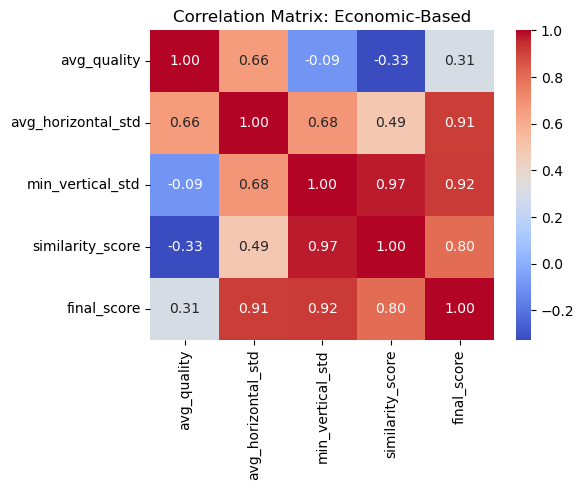

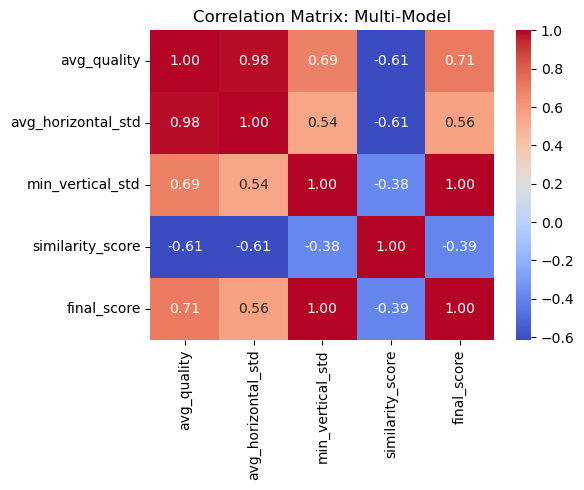

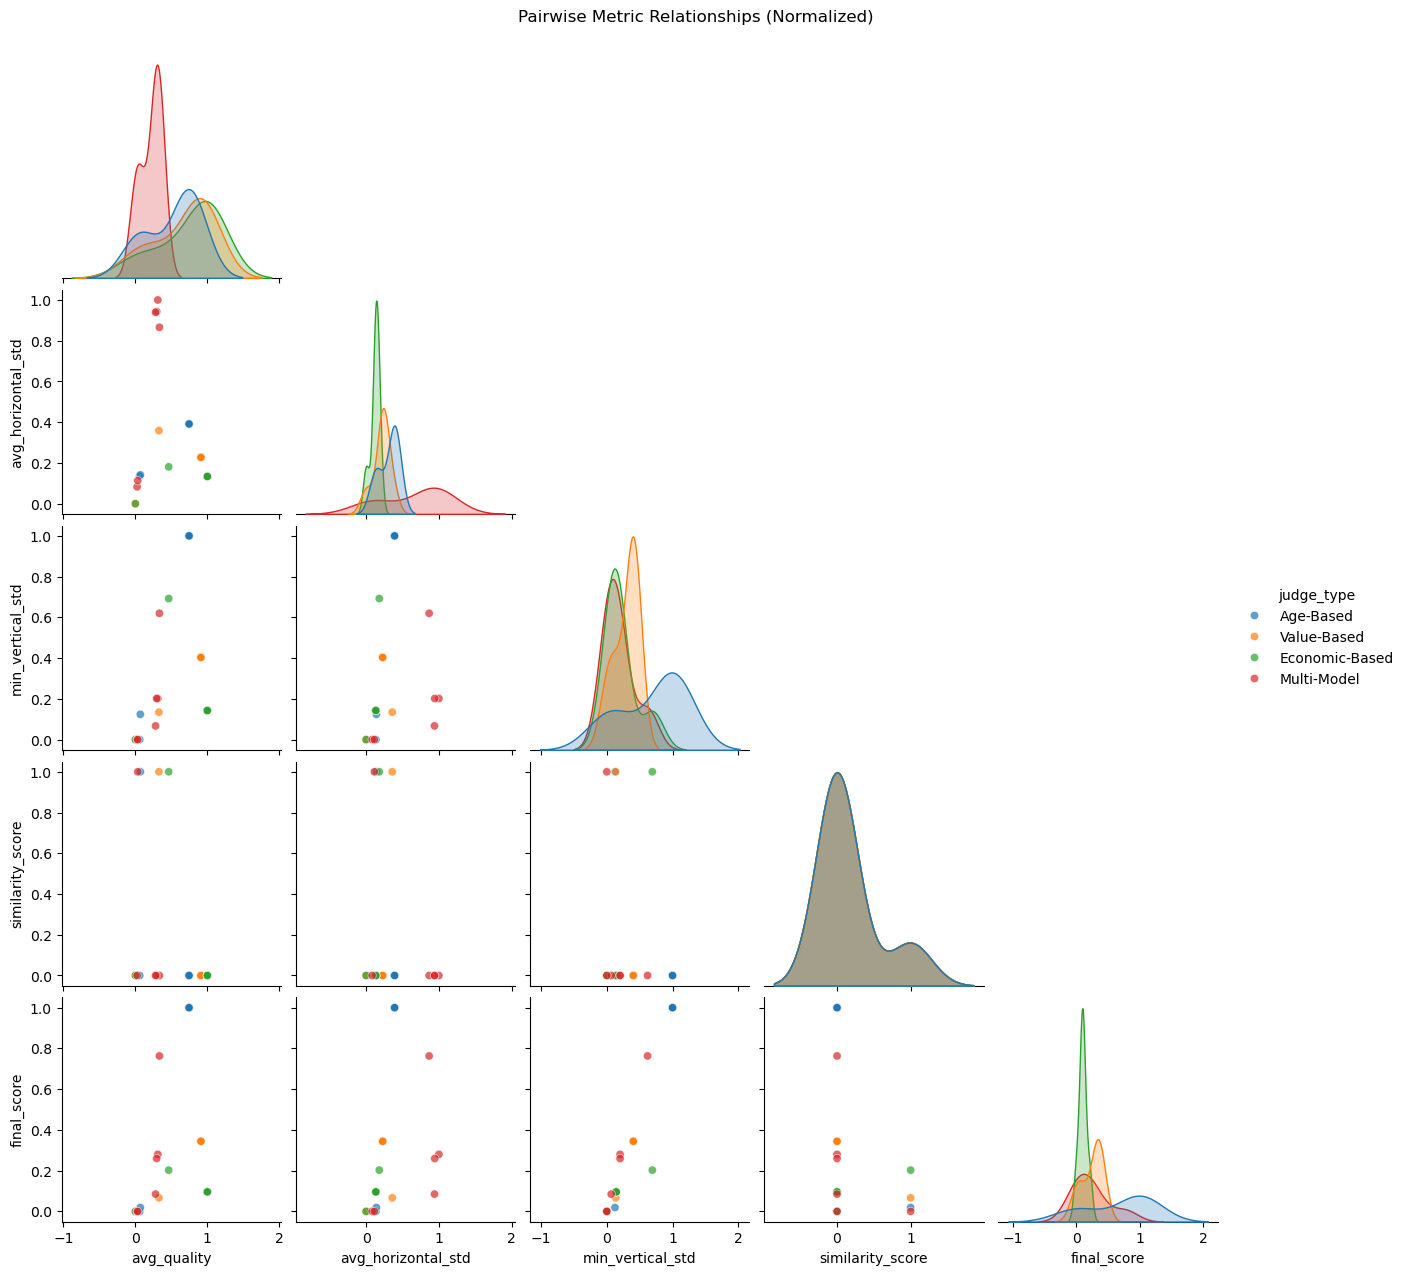

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Add all data back into one block
df_age["judge_type"] = "Age-Based"
df_value["judge_type"] = "Value-Based"
df_economic["judge_type"] = "Economic-Based"
df_multi_model["judge_type"] = "Multi-Model"

df_all = pd.concat([df_age, df_value, df_economic, df_multi_model], ignore_index=True)

# 1. Final Score Comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=df_all, x="strategy", y="final_score", hue="judge_type")
plt.title("Final Score Comparison Across Judge Types and Strategies")
plt.ylabel("Final Score")
plt.xticks(rotation=0, ha='center')

plt.tight_layout()
plt.show()

# 2. Sensitivity: Score STD per Judge
sensitivity = df_all.groupby("judge_type")["final_score"].std().reset_index(name="std_dev")
plt.figure(figsize=(8, 5))
sns.barplot(data=sensitivity, x="judge_type", y="std_dev", palette="Set2")
plt.title("Sensitivity to Strategy (Std Dev of Final Score)")
plt.ylabel("Score Std Dev")
plt.tight_layout()
plt.show()

# 3. Score Drop from S0 to S5
pivot = df_all.pivot(index="strategy", columns="judge_type", values="final_score")
score_drop = pivot.loc["S0: baseline"] - pivot.loc["S5: add controversy"]
score_drop.name = "Score Drop (S0 - S5)"
score_drop = score_drop.reset_index().rename(columns={"index": "judge_type"})

plt.figure(figsize=(8, 5))
sns.barplot(data=score_drop, x="judge_type", y="Score Drop (S0 - S5)", palette="Set1")
plt.title("Score Drop from Baseline to Controversy")
plt.ylabel("Drop in Final Score")
plt.tight_layout()
plt.show()

# 4. Correlation Heatmaps per Judge
def plot_corr(df, label):
    corr = df.drop(columns=["strategy", "judge_type", "english_score"]).corr()
    plt.figure(figsize=(6, 5))
    sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Matrix: {label}")
    plt.tight_layout()
    plt.show()

for jt in df_all["judge_type"].unique():
    plot_corr(df_all[df_all["judge_type"] == jt], jt)

# 5. Normalized Pairplot for Influence Mapping
metrics = ["avg_quality", "avg_horizontal_std", "min_vertical_std", "similarity_score", "final_score"]
df_plot = df_all.copy()
df_plot[metrics] = df_plot[metrics].astype(float)
df_plot[metrics] = (df_plot[metrics] - df_plot[metrics].min()) / (df_plot[metrics].max() - df_plot[metrics].min())

sns.pairplot(df_plot, vars=metrics, hue="judge_type", corner=True, plot_kws={"alpha": 0.7})
plt.suptitle("Pairwise Metric Relationships (Normalized)", y=1.02)
plt.show()
